In [1]:
!pip install MNE


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Extracting EDF parameters from D:\studia\magisterka\dane EEG\BADANIE_POLITYCZNE_2022_eeg_bdfy\Dane_EEG\s07.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


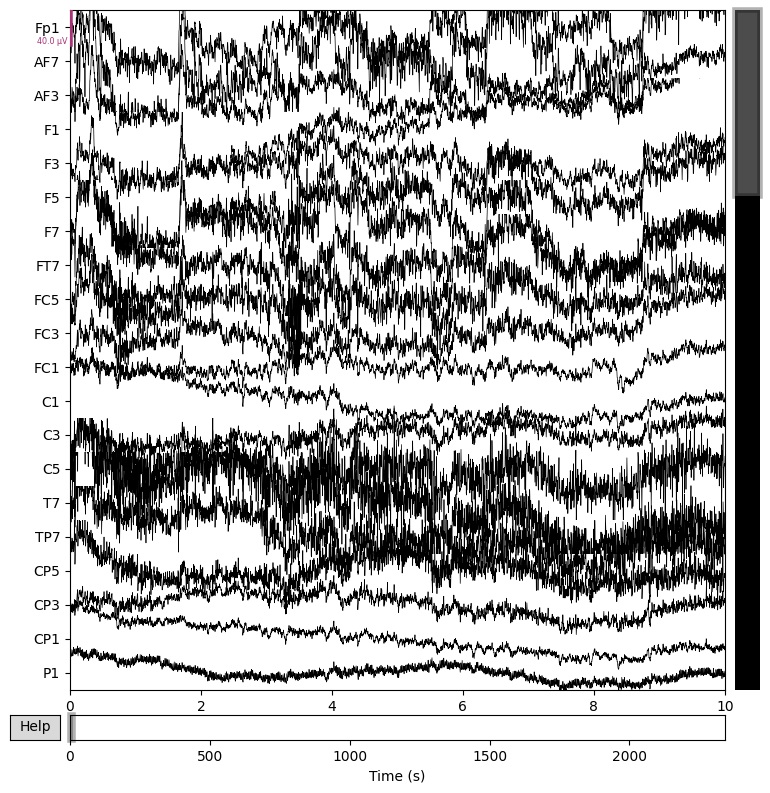

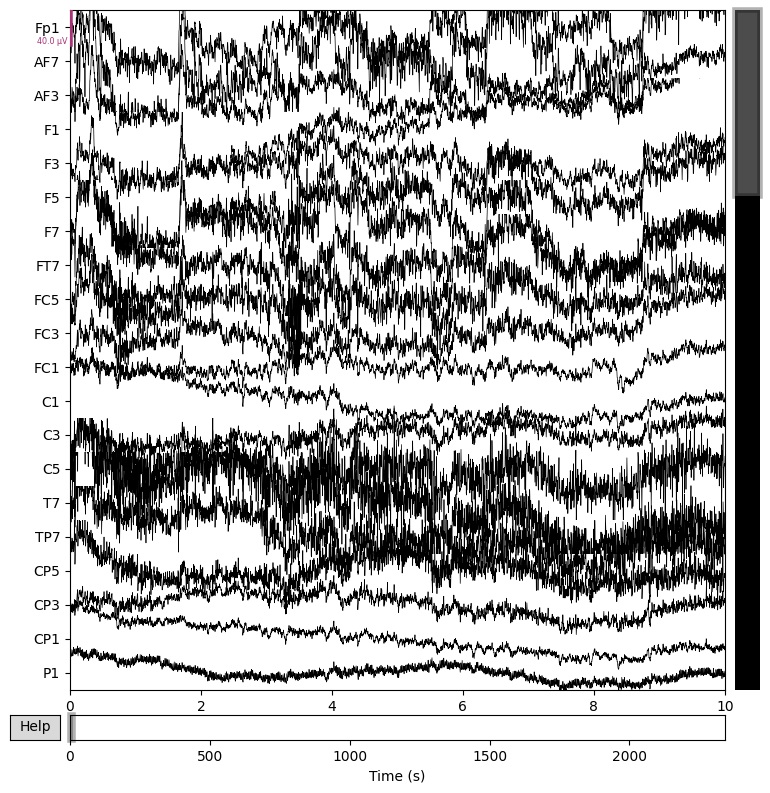

In [96]:
import mne as mne

path_file = "D:\studia\magisterka\dane EEG\BADANIE_POLITYCZNE_2022_eeg_bdfy\Dane_EEG\s07.bdf"
raw = mne.io.read_raw_bdf(path_file)

raw.plot()


In [97]:
print(raw.info)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 72 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2022-09-16 10:47:01 UTC
 nchan: 73
 projs: []
 sfreq: 512.0 Hz
 subject_info: <subject_info | his_id: >
>


In [98]:
channel_names = raw.info['ch_names']
print(channel_names)

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status']


In [110]:
#picked_channels = raw.pick(['Status'])

#picked_channels.plot(start = 40, duration = 40)

In [99]:
import numpy as np

# Pobierz dane z wybranego kanału
data, times = raw["Status", :]

# Znajdź unikalne wartości w danych z tego kanału
unique_values, counts = np.unique(data, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczebność: {count}")

len(unique_values)

Wartość: 65280.0, Liczebność: 1138304
Wartość: 65281.0, Liczebność: 6
Wartość: 65282.0, Liczebność: 3
Wartość: 65283.0, Liczebność: 5
Wartość: 65284.0, Liczebność: 4
Wartość: 65285.0, Liczebność: 4
Wartość: 65286.0, Liczebność: 5
Wartość: 65287.0, Liczebność: 4
Wartość: 65288.0, Liczebność: 3
Wartość: 65289.0, Liczebność: 4
Wartość: 65290.0, Liczebność: 4
Wartość: 65291.0, Liczebność: 3
Wartość: 65292.0, Liczebność: 4
Wartość: 65293.0, Liczebność: 5
Wartość: 65294.0, Liczebność: 5
Wartość: 65295.0, Liczebność: 3
Wartość: 65296.0, Liczebność: 4
Wartość: 65297.0, Liczebność: 4
Wartość: 65298.0, Liczebność: 5
Wartość: 65299.0, Liczebność: 4
Wartość: 65300.0, Liczebność: 5
Wartość: 65313.0, Liczebność: 4
Wartość: 65314.0, Liczebność: 6
Wartość: 65315.0, Liczebność: 3
Wartość: 65316.0, Liczebność: 4
Wartość: 65317.0, Liczebność: 5
Wartość: 65318.0, Liczebność: 5
Wartość: 65319.0, Liczebność: 4
Wartość: 65320.0, Liczebność: 4
Wartość: 65321.0, Liczebność: 4
Wartość: 65322.0, Liczebność: 5
Wa

164

In [100]:
z_excel = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244]

In [101]:
'''
def decimal_to_binary_string(decimal_number):
    binary_string = bin(decimal_number)[2:]
    binary_string_padded = binary_string.zfill(8)
    return binary_string_padded


def changes_of_events(x):
    if x != 65280.0 and x != 65530.0 and x != 65535.0 and x != 131071.0:
        x -= 65280
        x = int(x)
        x = decimal_to_binary_string(x)
        if x[1] == "1":
            return 1 #inverse
        elif x[1] == "0":
            return 2 # up
    else:
        return x


for i in range(len(data[0])):
    data[0][i] = changes_of_events(data[0][i])

unique_values, counts = np.unique(data, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczebność: {count}")
'''

'\ndef decimal_to_binary_string(decimal_number):\n    binary_string = bin(decimal_number)[2:]\n    binary_string_padded = binary_string.zfill(8)\n    return binary_string_padded\n\n\ndef changes_of_events(x):\n    if x != 65280.0 and x != 65530.0 and x != 65535.0 and x != 131071.0:\n        x -= 65280\n        x = int(x)\n        x = decimal_to_binary_string(x)\n        if x[1] == "1":\n            return 1 #inverse\n        elif x[1] == "0":\n            return 2 # up\n    else:\n        return x\n\n\nfor i in range(len(data[0])):\n    data[0][i] = changes_of_events(data[0][i])\n\nunique_values, counts = np.unique(data, return_counts=True)\nfor value, count in zip(unique_values, counts):\n    print(f"Wartość: {value}, Liczebność: {count}")\n'

In [102]:
def decimal_to_binary_string(decimal_number):
    binary_string = bin(decimal_number)[2:]
    binary_string_padded = binary_string.zfill(8)
    return binary_string_padded


def find_appropriate_events(x, tab1, tab2):
    if x != 65280.0 and x != 65530.0 and x != 65535.0 and x != 131071.0:
        y = x
        print(x)
        y -= 65280
        y = int(y)
        y = decimal_to_binary_string(y)
        if y[1] == "1":
            tab1.add(x) #inverse
        elif y[1] == "0":
            tab2.add(x) #up
    return tab1, tab2



tab1 = set()
tab2 = set()

for i in range(len(data[0])):
    tab1, tab2 = find_appropriate_events(data[0][i], tab1, tab2)

# Znajdź unikalne wartości w danych z tego kanału
#unique_values, counts = np.unique(data, return_counts=True)
#for value, count in zip(unique_values, counts):
 #   print(f"Wartość: {value}, Liczebność: {count}")

65455.0
65523.0
65381.0
65449.0
65449.0
65364.0
65511.0
65296.0
65422.0
65348.0
65348.0
65519.0
65314.0
65314.0
65417.0
65326.0
65409.0
65524.0
65290.0
65296.0
65482.0
65449.0
65362.0
65357.0
65390.0
65390.0
65460.0
65460.0
65441.0
65319.0
65319.0
65329.0
65516.0
65352.0
65352.0
65388.0
65360.0
65293.0
65293.0
65285.0
65442.0
65484.0
65421.0
65421.0
65428.0
65428.0
65427.0
65453.0
65453.0
65519.0
65411.0
65411.0
65455.0
65455.0
65426.0
65416.0
65473.0
65473.0
65383.0
65383.0
65509.0
65457.0
65485.0
65417.0
65417.0
65453.0
65387.0
65456.0
65488.0
65293.0
65293.0
65521.0
65486.0
65522.0
65297.0
65388.0
65386.0
65386.0
65355.0
65380.0
65291.0
65384.0
65283.0
65283.0
65521.0
65521.0
65298.0
65298.0
65510.0
65510.0
65299.0
65359.0
65359.0
65350.0
65350.0
65363.0
65377.0
65316.0
65316.0
65328.0
65379.0
65444.0
65316.0
65450.0
65450.0
65386.0
65507.0
65507.0
65409.0
65409.0
65389.0
65517.0
65293.0
65452.0
65331.0
65483.0
65474.0
65347.0
65347.0
65457.0
65323.0
65492.0
65480.0
65324.0
65322.0


In [103]:
events = mne.find_events(raw, stim_channel='Status')
new_events = mne.merge_events(events, tab1, 1)
new_events = mne.merge_events(new_events, tab2, 2)
print(new_events)

Trigger channel Status has a non-zero initial value of 131071 (consider using initial_event=True to detect this event)
960 events found on stim channel Status
Event IDs: [65281 65282 65283 65284 65285 65286 65287 65288 65289 65290 65291 65292
 65293 65294 65295 65296 65297 65298 65299 65300 65313 65314 65315 65316
 65317 65318 65319 65320 65321 65322 65323 65324 65325 65326 65327 65328
 65329 65330 65331 65332 65345 65346 65347 65348 65349 65350 65351 65352
 65353 65354 65355 65356 65357 65358 65359 65360 65361 65362 65363 65364
 65377 65378 65379 65380 65381 65382 65383 65384 65385 65386 65387 65388
 65389 65390 65391 65392 65393 65394 65395 65396 65409 65410 65411 65412
 65413 65414 65415 65416 65417 65418 65419 65420 65421 65422 65423 65424
 65425 65426 65427 65428 65441 65442 65443 65444 65445 65446 65447 65448
 65449 65450 65451 65452 65453 65454 65455 65456 65457 65458 65459 65460
 65473 65474 65475 65476 65477 65478 65479 65480 65481 65482 65483 65484
 65485 65486 65487 65488 65

In [104]:
event_dict = {'inverse': 1, 'up' : 2}
epochs = mne.Epochs(
    raw,
    events=new_events,
    event_id=event_dict,
    tmin=-0.2,
    tmax=0.5,
    baseline=(0,0),
    preload=True
)

Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 480 events and 359 original time points ...
0 bad epochs dropped


In [105]:
print(epochs)

<Epochs | 480 events (all good), -0.199 – 0.5 s (baseline 0 – 0 s), ~96.0 MiB, data loaded,
 'inverse': 240
 'up': 240>


Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Julia\AppData\Local\Temp\ipykernel_14084\616711016.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  fig = epochs.plot_image(picks=['P7'])


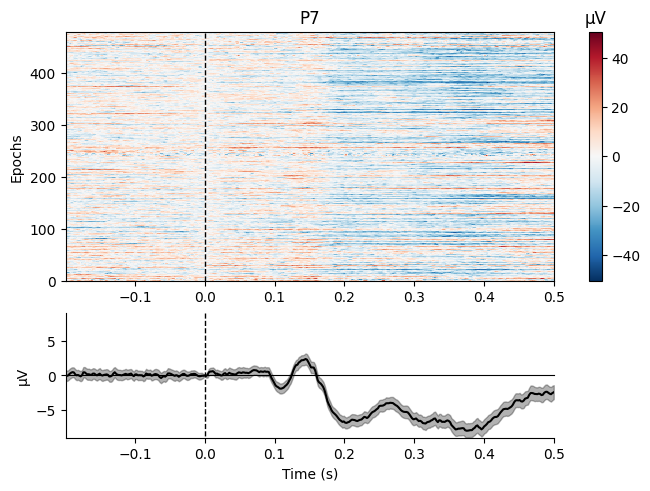

In [106]:
fig = epochs.plot_image(picks=['P7'])

combining channels using "mean"
combining channels using "mean"


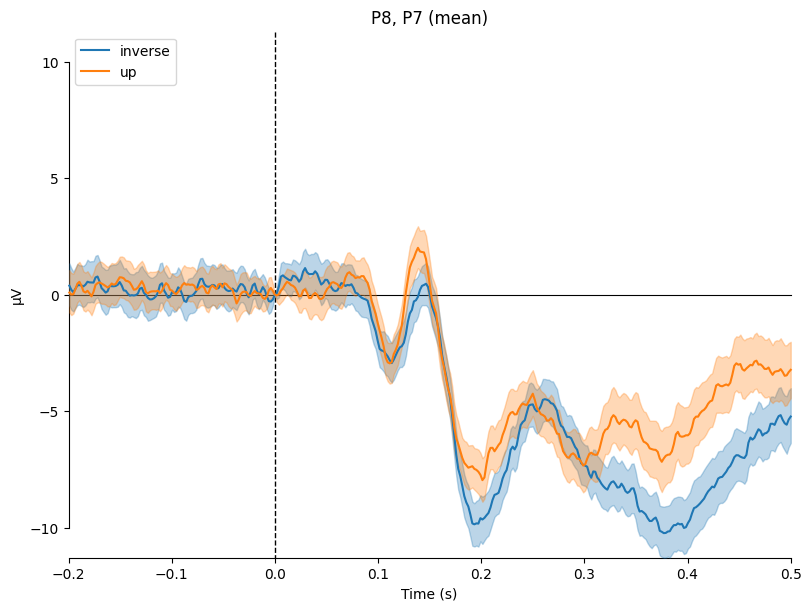

In [107]:
evokeds = dict(inverse=list(epochs['inverse'].iter_evoked()),
                up=list(epochs['up'].iter_evoked()))
picks = ["P8", 'P7']

fig = mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=picks, ci=0.95)

In [82]:
check_eyes = raw.pick(['Fp1', 'AF4', 'AF3', 'AFz', 'Fpz'])
#check_eyes = raw.pick(['Fp1'])

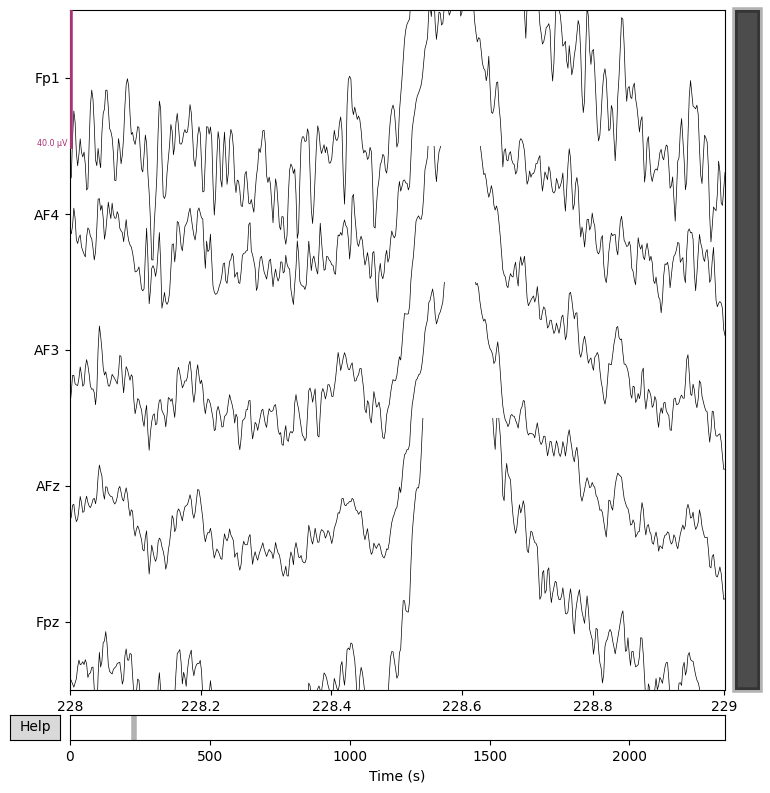

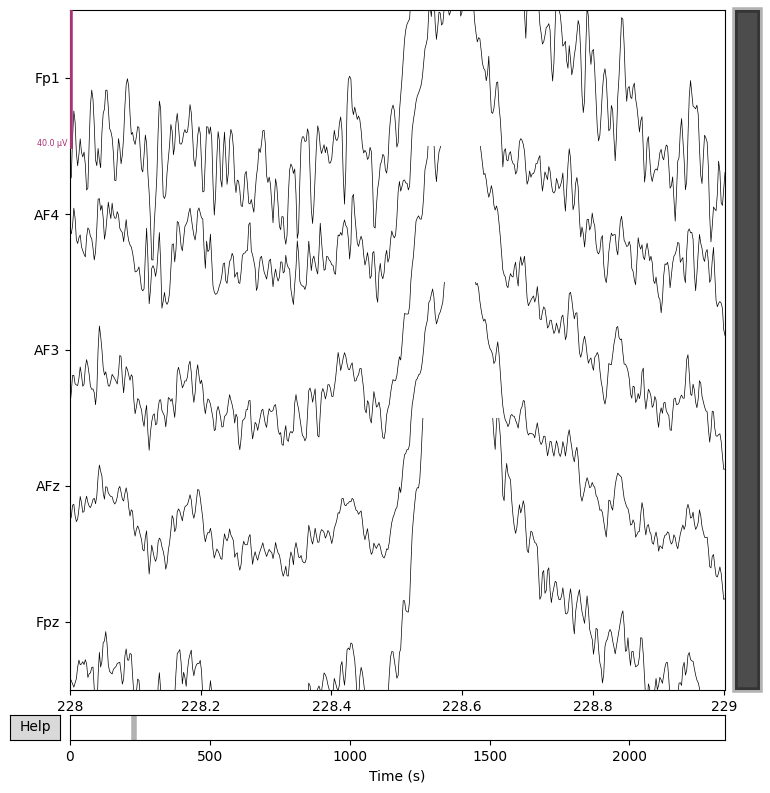

In [108]:
check_eyes.plot(start=228, duration = 1)